Importar as bibliotecas necessárias

In [ ]:
# @title Texto de título padrão
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

Carregar os dados

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

Etapa 1: Normalização dos Dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler


Dropar a coluna 'classe' (não será usada para o agrupamento)

In [ ]:
X = vinhos.drop('classe', axis=1)

Reescalar os dados para o intervalo [0, 1]

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Etapa 2: Aplicação do K-Means

In [ ]:
from sklearn.cluster import KMeans


Aplicar K-Means com 4 clusters e random_state=42

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
vinhos['cluster'] = kmeans.fit_predict(X_scaled)


Valor da inércia

In [ ]:
print(f"Inércia do modelo K-Means: {kmeans.inertia_:.4f}")

Inércia do modelo K-Means: 44.8876


Etapa 3: Análise dos Clusters,
Apresentar a contagem de cada cluster

In [ ]:
print("\nDistribuição dos clusters:")
print(vinhos['cluster'].value_counts())



Distribuição dos clusters:
cluster
2    59
1    50
0    36
3    33
Name: count, dtype: int64


Etapa 4: Comparação com Classes Originais,
Comparação dos clusters com as classes originais

In [ ]:
print("\nComparação entre clusters e classes originais (usando groupby):")
comparacao_groupby = vinhos.groupby('cluster')['classe'].value_counts()
print(comparacao_groupby)


Comparação entre clusters e classes originais (usando groupby):
cluster  classe
0        2         34
         1          2
1        3         48
         2          2
2        1         57
         2          2
3        2         33
Name: count, dtype: int64


Comparação usando tabela cruzada

In [ ]:
# prompt: print("\nComparação entre clusters e classes originais (usando crosstab):")
# comparacao_crosstab = pd.crosstab(vinhos['classe'], vinhos['cluster'])
# print(comparacao_crosstab)

print("\nComparação entre clusters e classes originais (usando crosstab):")
comparacao_crosstab = pd.crosstab(vinhos['classe'], vinhos['cluster'])
comparacao_crosstab


Comparação entre clusters e classes originais (usando crosstab):


cluster,0,1,2,3
classe,,,,
1,2,0,57,0
2,34,2,2,33
3,0,48,0,0


Visualização opcional (se necessário)

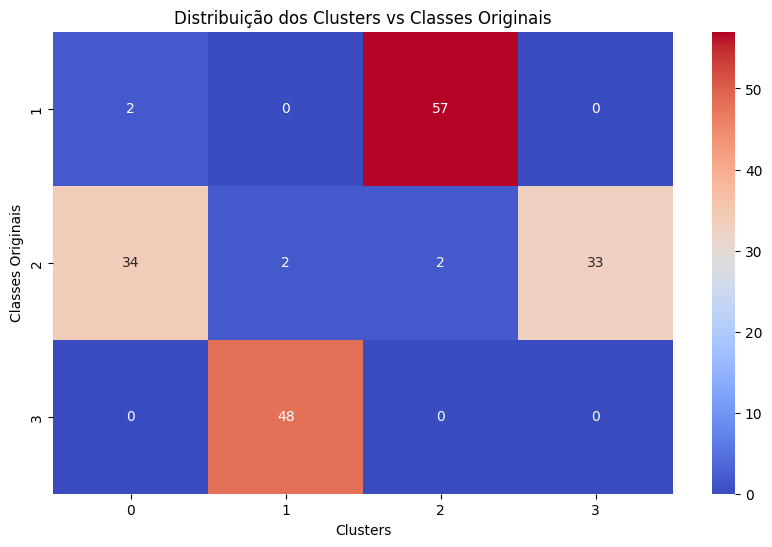

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(comparacao_crosstab, annot=True, cmap='coolwarm', fmt="d")
plt.title("Distribuição dos Clusters vs Classes Originais")
plt.xlabel("Clusters")
plt.ylabel("Classes Originais")
plt.show()